In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Python

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
a = float(input('Enter a: '))
d = float(input('Enter d: '))
N = int(input('Enter N: '))
for i in range(N):
    a += d
print(a)

Enter a: 1
Enter d: 1
Enter N: 4
5.0


**Task 2** (0.5 points) <br/> 
Enter a number `N`. Find sum of the first `N` memebers of harmonic series.

In [3]:
N = int(input('Enter N: '))
ans = 0
for i in range(1,N+1):
    ans += 1/i
print(ans)

Enter N: 5
2.283333333333333


**Task 3** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [5]:
def is_prime(N):
    ans = True
    for i in range(2,N):
        if N % i == 0:
            return False
    return True

N = int(input('Enter N: '))
print(is_prime(N))

Enter N: 47
True


**Task 4** (0.5 points) <br/> 
Enter the first `N` prime numbers.

In [6]:
N = int(input('Enter N: '))
i = 1
while N > 0:
    if is_prime(i):
        N -= 1
        print(i)
    i += 1

Enter N: 4
1
2
3
5


**Task 5** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the maximum number.

In [7]:
a, b, c = [float(input('Enter {} number: '.format(x))) for x in range(1,4)]
a = a if a > b else b
print(a if a > c else c)

Enter 1 number: 1
Enter 2 number: 10
Enter 3 number: 4
10.0


# 2. Numpy

**Task 1** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$


In [8]:
a = np.random.rand(3)
b = np.random.rand(3)
print("Euclidean Distance: ", np.linalg.norm(a-b))
print("Manhattan Distance: ", np.abs(a-b).sum())
print("Cosine Distance: ", 1 - a.T @ b / (np.linalg.norm(a) * np.linalg.norm(a)))

Euclidean Distance:  0.8098602435169086
Manhattan Distance:  1.0521840140929277
Cosine Distance:  0.3188155203901072


**Task 2** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 10 and with sum of its elements equals to 2.

In [9]:
a = np.random.rand(10)
a /= (a.sum() / 2)
a.sum()

2.0

**Task 3** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 100. Transform the array so, that 
* Maximum element(s) value is 1
* Minimum element(s) value is 0
* Other values are in interval 0-1 with keeping the order

In [10]:
a = np.random.rand(100)
a -= a.min()
a *= 1 / a.max()
assert a.min() == 0
assert a.max() == 1

**Task 4** (0.5 points) <br/>
Create a random array with length of 20 with integers from [0,50]. Select elements that are smaller than 5th percentile and larger than 95th percentile

In [11]:
a = np.random.randint(0, high=51, size=(20))
per5 = np.percentile(a, 5)
per95 = np.percentile(a, 95)
smaller = []
larger = []
for i in a:
    if i > per95:
        larger.append(i)
    elif i < per5:
        smaller.append(i)

print('Elements that are smaller then 5th percentile: ', smaller)
print('Elements that are larger then 95th percentile: ', larger)

Elements that are smaller then 5th percentile:  [9]
Elements that are larger then 95th percentile:  [49]


**Task 5** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integer from [0,50]. Print a column that contains the maximum element of the array.

In [12]:
a = np.random.randint(0, high=51, size=(5,6))
print(a)
print('\nA column with maximum element: ', a[:,a.argmax() % a.shape[1]])

[[ 6  3 35 27 40  4]
 [49 26 42 30 45 39]
 [11 30 20  8 20 44]
 [22  0 47 19 29 40]
 [48 42 23 23 20 17]]

A column with maximum element:  [ 6 49 11 22 48]


**Task 6** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [13]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
arr

array([       nan, 0.07737919,        nan, 0.68456688, 0.97733723,
       0.05390359, 0.52732267,        nan,        nan, 0.85435077])

In [14]:
nan_mask = np.isnan(arr)
arr[nan_mask] = arr[nan_mask ^ True].mean()
arr

array([0.52914339, 0.07737919, 0.52914339, 0.68456688, 0.97733723,
       0.05390359, 0.52732267, 0.52914339, 0.52914339, 0.85435077])

### Linear Regression

Download [file 1](https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv?dl=0) and [file 2](https://www.dropbox.com/s/f87gm612o144emx/tutorial_dataset_2.csv?dl=0) into a directory with this notebook. Using function `loadtxt` in `numpy` load data from the first file. Assign y = D[:,0] аnd X = D[:, 1:].


We will use one magic formula to find linear regression coefficients. You will prove this formula on your next lectures of the course.

Linear regression model in matrix form looks like: $\hat{y} = X\hat{\beta}$, where

$$ \hat{\beta} = (X^\top X)^{-1} X^\top y $$
Model residuals are calculated as
$$ \text{res} = y - \hat{y} $$


**Task 7** (2.5 points)<br/>
1. Load the data
2. Find parameters $\hat{\beta}$ using the formula above
3. Make a plot with the model residuals on Y axis and $\hat{y}$ on X axis

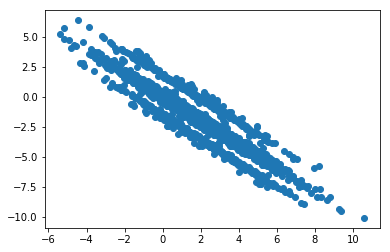

In [17]:
## load data
D = np.loadtxt('tutorial_dataset.csv', 
               skiprows=1, 
               delimiter=',')

## Your code here
y = D[:,0]
X = D[:,1:]
beta = (X.T @ X)**-1 @ X.T @ y
y_predict = X @ beta
res = y - y_predict

plt.scatter(y_predict, res)

# 3. Pandas

### Wine Quality

Download [sample](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) with information about wine characteristics and its quality.

In [19]:
## load data
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Task 1 ** (1 point) <br/>
* How much objects are in the sample?
* What features describe the objects? How much these features?
* What is feature a target variable?
* What are their ranges?
* Are there any missing values?

In [31]:
print("{0} objects are in the sample.".format(len(df)))

1599 objects are in the sample.


In [32]:
print("The number of features is ", len(df.columns))
df.columns

The number of features is  12


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
print("A target value is quality.")
df['quality'].head()

A target value is quality.


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [34]:
print("Ranges of quality marks is [{0},{1}]".format(df['quality'].min(), df['quality'].max()))

Ranges of quality marks is [3,8]


In [37]:
df[df.isnull() == True].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing values

**Task 2** (1 point)<br/>
What features affect the target variable the most?

In [41]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

**As we can see the amount of alcohol in the wine most affects the score**